In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
data = np.array([2,3,3,4,4,4,4,5,5,6])

In [3]:
# 평균
mu_1 = np.sum(data) / len(data)
mu_2 = np.mean(data)
mu_1, mu_2

(4.0, 4.0)

In [4]:
# 분산
var_1 = np.sum((data - mu_1)**2) / len(data)
var_2 = np.var(data)
var_1, var_2

(1.2, 1.2)

In [5]:
# 표본의 분산(불편분산)
var_3 = np.var(data, ddof=1)
var_3

1.3333333333333333

In [6]:
# 표준편차
std_1 = np.sqrt(var_1)
std_2 = np.std(data)
std_1, std_2

(1.0954451150103321, 1.0954451150103321)

In [7]:
# 불편분산의 표준편차
std_3 = np.sqrt(var_3)
std_4 = np.std(data, ddof=1)
std_3, std_4

(1.1547005383792515, 1.1547005383792515)

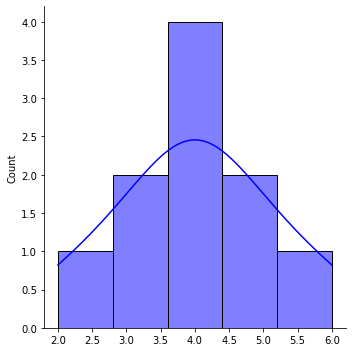

In [8]:
sns.displot(data, bins=5, color="blue", kde=True);

---

In [9]:
import pandas as pd

In [10]:
fish_multi = pd.read_csv("../data/3-3-2-fish_multi_2.csv")
fish_multi.tail()

,species,length
15,B,7
16,B,7
17,B,8
18,B,8
19,B,9


In [11]:
fish_multi.groupby("species").describe()

length                                          
         count mean       std  min   25%  50%   75%  max
species                                                 
A         10.0  4.0  1.154701  2.0  3.25  4.0  4.75  6.0
B         10.0  7.0  1.154701  5.0  6.25  7.0  7.75  9.0

In [12]:
len_a = fish_multi.query("species == 'A'")["length"]
len_b = fish_multi.query("species == 'B'")["length"]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


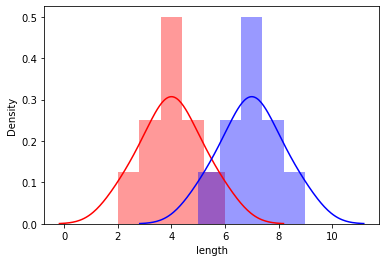

In [13]:
sns.distplot(len_a, bins=5, color="red", kde=True);
sns.distplot(len_b, bins=5, color="blue", kde=True);

<AxesSubplot:xlabel='species', ylabel='length'>

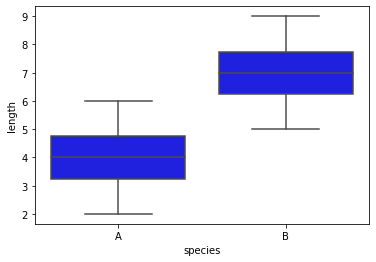

In [14]:
sns.boxplot(x = "species", y = "length", data = fish_multi, color="blue")

<AxesSubplot:xlabel='species', ylabel='length'>

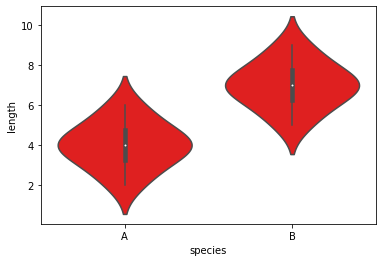

In [15]:
sns.violinplot(x = "species", y = "length", data = fish_multi, color = "red")

In [16]:
cov_data = pd.read_csv("../data/3-2-3-cov.csv")

In [17]:
cov_data.tail()

,x,y
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


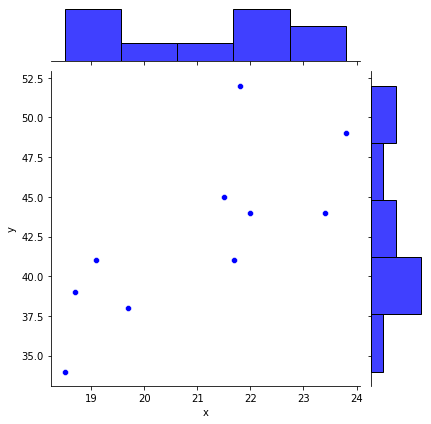

In [18]:
sns.jointplot(x="x", y="y", data=cov_data, color="blue");

---

In [19]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [20]:
fish_5  = np.array([2,3,4,5,6])

In [21]:
# 비복원 추출
np.random.choice(fish_5, size=1, replace=False)

array([3])

In [22]:
np.random.choice(fish_5, size=3, replace=False)

array([4, 3, 6])

In [23]:
np.random.seed(13)
data = np.random.choice(fish_5, size=3, replace=False)
data

array([3, 5, 6])

In [24]:
np.mean(data)

4.666666666666667

In [25]:
fish_1000000 = pd.read_csv("../data/3-4-1-fish_length_100000.csv")["length"]
fish_1000000

0        5.297442
1        3.505566
2        3.572546
3        3.135979
4        4.689275
           ...   
99995    4.158780
99996    4.818718
99997    4.060880
99998    4.271488
99999    3.396745
Name: length, Length: 100000, dtype: float64

In [26]:
sampling_res = np.random.choice(fish_1000000, size=10, replace=False)

In [27]:
sampling_res

array([4.75108188, 4.37498586, 3.78013026, 2.96949093, 2.68097807,
       5.00637838, 4.31302466, 3.46929683, 5.16443516, 3.2858849 ])

In [28]:
np.mean(sampling_res)

3.9795686948818956

In [29]:
np.mean(fish_1000000)

4.000000000000023

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='length', ylabel='Density'>

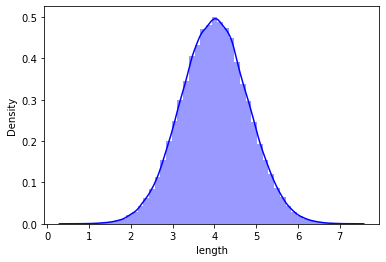

In [30]:
sns.distplot(fish_1000000, kde=True, color="blue")

In [31]:
# 모집단의 평균
np.mean(fish_1000000)

4.000000000000023

In [32]:
# 모집단의 분포
np.std(fish_1000000, ddof=0)

0.8000000000000054

In [33]:
# 1부터 7까지 0.1간격의 데이터 추출
x = np.arange(1, 7.1, 0.1)
x

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. ])

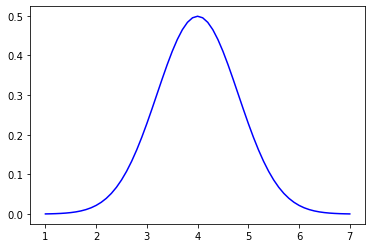

In [34]:
# 정규분포(평균이 4이고, 표준편차이 0.8인 정규분포)
# 참고 : https://m.blog.naver.com/pmw9440/221805677577
stats.norm.pdf(x=x, loc=4, scale=0.8)
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color="blue")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


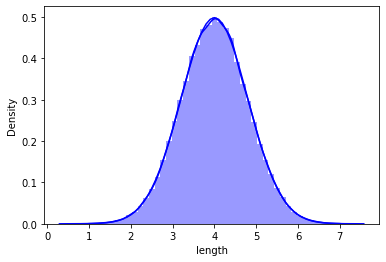

In [35]:
sns.distplot(fish_1000000, kde=True, color="blue", norm_hist=True);
plt.plot(x, stats.norm.pdf(x=x, loc=4, scale=0.8), color="blue");

---

## 표본 통계

In [36]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

In [37]:
# 평균이 4이고, 표준편차가 0.8인 정규분포를 따르는 모집단 선언
population = stats.norm(loc=4, scale=0.8)

In [38]:
population

In [39]:
# 평균이 4이고, 표준편차가 0.8인 정규분포를 따르는 모집단에서 10개의 데이터를 추출
population.rvs(size=10)

array([4.18898812, 4.79061943, 4.28772989, 4.04296001, 4.09719955,
       2.05939026, 3.07932599, 3.74287471, 3.19586343, 4.63246982])

In [40]:
sample_mean_array = np.zeros(10000)
sample_mean_array, len(sample_mean_array)

(array([0., 0., 0., ..., 0., 0., 0.]), 10000)

In [41]:
np.random.seed(13)
for i in range(0, len(sample_mean_array)):
    sample = population.rvs(size = 10)
    sample_mean_array[i] = np.mean(sample)

In [42]:
sample_mean_array

array([4.3976666 , 4.18857764, 3.8425394 , ..., 4.12495865, 4.12127892,
       4.05054023])

In [43]:
np.mean(sample_mean_array)

4.003651723722899

In [44]:
np.std(sample_mean_array, ddof=0)

0.25328735533634056

In [45]:
np.std(sample_mean_array, ddof=1)

0.25330002065401414

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


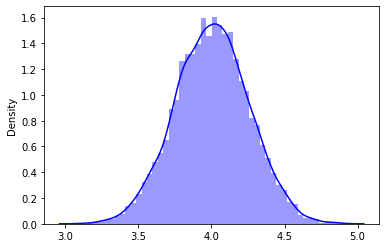

In [46]:
sns.distplot(sample_mean_array, color="blue");

In [68]:
# 샘플사이즈를 다양하게 다시 시도해보자
size_array = np.arange(10, 100100, 100)
len(size_array), size_array

(1001, array([    10,    110,    210, ...,  99810,  99910, 100010]))

In [69]:
sample_mean_array_size = np.zeros(len(size_array))

In [70]:
len(sample_mean_array_size), sample_mean_array_size

(1001, array([0., 0., 0., ..., 0., 0., 0.]))

In [71]:
for i in range(0, len(size_array)):
    print(f"모집단에서 {size_array[i]} 개수만큼 추출해주세요." )
    sample = population.rvs(size=size_array[i])
    print(f"모집단에서 {size_array[i]} 개수만큼 추출한 데이터의 평균을 만들어주세요." )
    sample_mean_array_size[i] = np.mean(sample)

모집단에서 10 개수만큼 추출해주세요.
모집단에서 10 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 110 개수만큼 추출해주세요.
모집단에서 110 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 210 개수만큼 추출해주세요.
모집단에서 210 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 310 개수만큼 추출해주세요.
모집단에서 310 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 410 개수만큼 추출해주세요.
모집단에서 410 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 510 개수만큼 추출해주세요.
모집단에서 510 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 610 개수만큼 추출해주세요.
모집단에서 610 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 710 개수만큼 추출해주세요.
모집단에서 710 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 810 개수만큼 추출해주세요.
모집단에서 810 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 910 개수만큼 추출해주세요.
모집단에서 910 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 1010 개수만큼 추출해주세요.
모집단에서 1010 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 1110 개수만큼 추출해주세요.
모집단에서 1110 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 1210 개수만큼 추출해주세요.
모집단에서 1210 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 1310 개수만큼 추출해주세요.
모집단에서 1310 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 1410 개수만큼 추출해주세요.
모집단에서 1410 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 1510 개수만큼 추출해주세요.
모집단에서 1510 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 1610 개수만큼 추출해주세요.
모집단에서 1610 개수만큼 추출한 데이

모집단에서 30910 개수만큼 추출해주세요.
모집단에서 30910 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31010 개수만큼 추출해주세요.
모집단에서 31010 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31110 개수만큼 추출해주세요.
모집단에서 31110 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31210 개수만큼 추출해주세요.
모집단에서 31210 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31310 개수만큼 추출해주세요.
모집단에서 31310 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31410 개수만큼 추출해주세요.
모집단에서 31410 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31510 개수만큼 추출해주세요.
모집단에서 31510 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31610 개수만큼 추출해주세요.
모집단에서 31610 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31710 개수만큼 추출해주세요.
모집단에서 31710 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31810 개수만큼 추출해주세요.
모집단에서 31810 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 31910 개수만큼 추출해주세요.
모집단에서 31910 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 32010 개수만큼 추출해주세요.
모집단에서 32010 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 32110 개수만큼 추출해주세요.
모집단에서 32110 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 32210 개수만큼 추출해주세요.
모집단에서 32210 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 32310 개수만큼 추출해주세요.
모집단에서 32310 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 32410 개수만큼 추출해주세요.
모집단에서 32410 개수만큼 추출한 데이터의 평균을 

모집단에서 47210 개수만큼 추출해주세요.
모집단에서 47210 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 47310 개수만큼 추출해주세요.
모집단에서 47310 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 47410 개수만큼 추출해주세요.
모집단에서 47410 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 47510 개수만큼 추출해주세요.
모집단에서 47510 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 47610 개수만큼 추출해주세요.
모집단에서 47610 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 47710 개수만큼 추출해주세요.
모집단에서 47710 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 47810 개수만큼 추출해주세요.
모집단에서 47810 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 47910 개수만큼 추출해주세요.
모집단에서 47910 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 48010 개수만큼 추출해주세요.
모집단에서 48010 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 48110 개수만큼 추출해주세요.
모집단에서 48110 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 48210 개수만큼 추출해주세요.
모집단에서 48210 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 48310 개수만큼 추출해주세요.
모집단에서 48310 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 48410 개수만큼 추출해주세요.
모집단에서 48410 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 48510 개수만큼 추출해주세요.
모집단에서 48510 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 48610 개수만큼 추출해주세요.
모집단에서 48610 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 48710 개수만큼 추출해주세요.
모집단에서 48710 개수만큼 추출한 데이터의 평균을 

모집단에서 68610 개수만큼 추출해주세요.
모집단에서 68610 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 68710 개수만큼 추출해주세요.
모집단에서 68710 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 68810 개수만큼 추출해주세요.
모집단에서 68810 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 68910 개수만큼 추출해주세요.
모집단에서 68910 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69010 개수만큼 추출해주세요.
모집단에서 69010 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69110 개수만큼 추출해주세요.
모집단에서 69110 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69210 개수만큼 추출해주세요.
모집단에서 69210 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69310 개수만큼 추출해주세요.
모집단에서 69310 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69410 개수만큼 추출해주세요.
모집단에서 69410 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69510 개수만큼 추출해주세요.
모집단에서 69510 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69610 개수만큼 추출해주세요.
모집단에서 69610 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69710 개수만큼 추출해주세요.
모집단에서 69710 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69810 개수만큼 추출해주세요.
모집단에서 69810 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 69910 개수만큼 추출해주세요.
모집단에서 69910 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 70010 개수만큼 추출해주세요.
모집단에서 70010 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 70110 개수만큼 추출해주세요.
모집단에서 70110 개수만큼 추출한 데이터의 평균을 

모집단에서 83310 개수만큼 추출해주세요.
모집단에서 83310 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 83410 개수만큼 추출해주세요.
모집단에서 83410 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 83510 개수만큼 추출해주세요.
모집단에서 83510 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 83610 개수만큼 추출해주세요.
모집단에서 83610 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 83710 개수만큼 추출해주세요.
모집단에서 83710 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 83810 개수만큼 추출해주세요.
모집단에서 83810 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 83910 개수만큼 추출해주세요.
모집단에서 83910 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 84010 개수만큼 추출해주세요.
모집단에서 84010 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 84110 개수만큼 추출해주세요.
모집단에서 84110 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 84210 개수만큼 추출해주세요.
모집단에서 84210 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 84310 개수만큼 추출해주세요.
모집단에서 84310 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 84410 개수만큼 추출해주세요.
모집단에서 84410 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 84510 개수만큼 추출해주세요.
모집단에서 84510 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 84610 개수만큼 추출해주세요.
모집단에서 84610 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 84710 개수만큼 추출해주세요.
모집단에서 84710 개수만큼 추출한 데이터의 평균을 만들어주세요.
모집단에서 84810 개수만큼 추출해주세요.
모집단에서 84810 개수만큼 추출한 데이터의 평균을 

In [72]:
np.mean(sample_mean_array_size)

3.9997492800678525

In [73]:
np.std(sample_mean_array_size, ddof=0)

0.00673814919308431

In [74]:
np.std(sample_mean_array_size, ddof=1)

0.006741517425833075

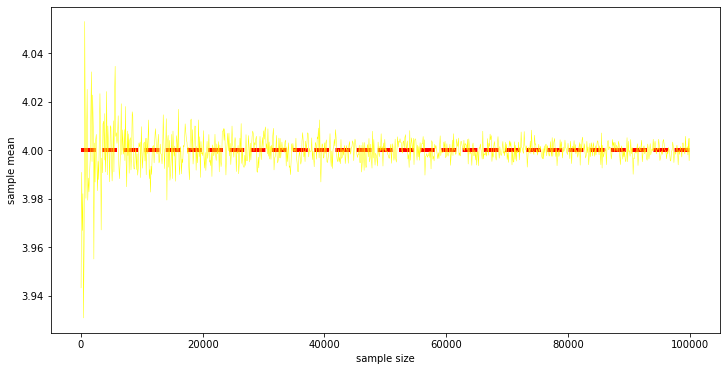

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(size_array, sample_mean_array_size, color="yellow", lw=0.5)
# y=4, x는 0부터 size_array의 최대값까지
plt.hlines(4, 0, max(size_array), color="red", linestyles="dashed", lw=4)
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

### 평균을 계산하는 함수

In [83]:
def calc_sample_mean(size, n_trail):
    
    # 평균이 4이고, 표준편차가 0.8인 정규분포를 따르는 모집단 선언
    population = stats.norm(loc=4, scale=0.8)
    
    # 요소가 0이고 길이가 n_trail인 numpy.array 반환
    sample_mean_array = np.zeros(n_trail)
    
    for i in range(0, n_trail):
        
        # 평균이 4이고, 표준편차가 0.8인 정규분포를 따르는 모집단에서 10개의 데이터를 추출
        sample = population.rvs(size=size)
        sample_mean_array[i] = np.mean(sample)
        
    return(sample_mean_array)

In [84]:
calc_sample_mean(100, 10000)

array([4.12242933, 4.05977834, 3.87314501, ..., 4.05526546, 4.01260048,
       4.04033323])

In [87]:
size_array = np.arange(2, 102, 2)
len(size_array), size_array

(50,
 array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
         28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
         54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
         80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100]))

In [91]:
sample_mean_std_array = np.zeros(len(size_array))
np.random.seed(13)

for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(size=size_array[i], n_trail=100)
    sample_mean_std_array[i] = np.std(sample_mean, ddof=1)

### 결과 : 표본의 샘플이 많아질 수록 표준편차가 작아진다

Text(0, 0.5, 'maen_std value')

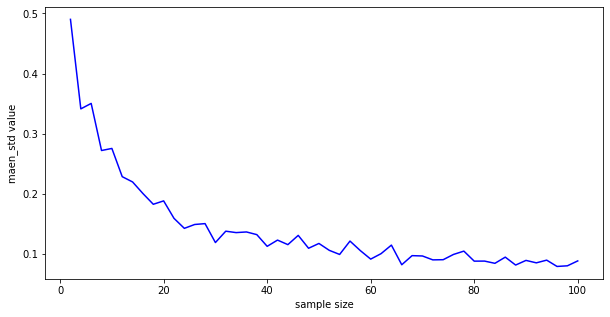

In [98]:
plt.figure(figsize=(10,5))
plt.plot(size_array, sample_mean_std_array, color="blue")
plt.xlabel("sample size")
plt.ylabel("maen_std value")

In [99]:
size_array

array([  2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,
        28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,
        54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,
        80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100])

In [100]:
se = 0.8 / np.sqrt(size_array)

In [101]:
se

array([0.56568542, 0.4       , 0.32659863, 0.28284271, 0.25298221,
       0.23094011, 0.21380899, 0.2       , 0.18856181, 0.17888544,
       0.17056057, 0.16329932, 0.15689291, 0.15118579, 0.14605935,
       0.14142136, 0.13719887, 0.13333333, 0.12977714, 0.12649111,
       0.12344268, 0.12060454, 0.11795356, 0.11547005, 0.11313708,
       0.11094004, 0.10886621, 0.1069045 , 0.10504515, 0.10327956,
       0.1016001 , 0.1       , 0.09847319, 0.09701425, 0.09561829,
       0.0942809 , 0.09299811, 0.09176629, 0.09058216, 0.08944272,
       0.08834522, 0.08728716, 0.08626622, 0.08528029, 0.0843274 ,
       0.08340577, 0.0825137 , 0.08164966, 0.0808122 , 0.08      ])

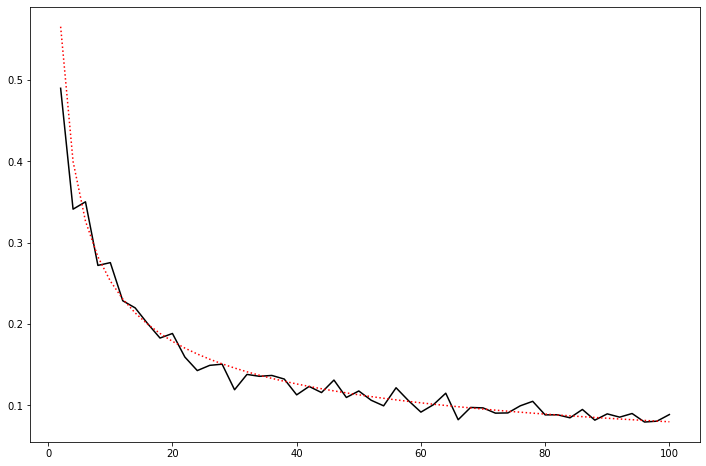

In [107]:
plt.figure(figsize=(12,8))
plt.plot(size_array, sample_mean_std_array, color="black");
plt.plot(size_array, se, color="red", ls="dotted")

### 표본분산의 평균값은 모분산과 차이가 있다.

In [114]:
# 분산
sample_var_array = np.zeros(10000)
np.random.seed(13)

for i in range(0, 10000):
    sample = population.rvs(size=10)
    sample_var_array[i] = np.var(sample, ddof=0)
    
np.mean(sample_var_array)

0.5792337629333761

In [115]:
# 불편분산
unbias_var_array = np.zeros(10000)
np.random.seed(13)

for i in range(0, 10000):
    sample = population.rvs(size=10)
    unbias_var_array[i] = np.var(sample, ddof=1)
    
np.mean(unbias_var_array)

0.6435930699259735

In [117]:
size_array = np.arange(10, 100100, 100)

unbias_var_array_size = np.zeros(len(size_array))
for i in range(0, len(size_array)):
    sample = population.rvs(size=size_array[i])
    unbias_var_array_size[i] = np.var(sample, ddof=1)

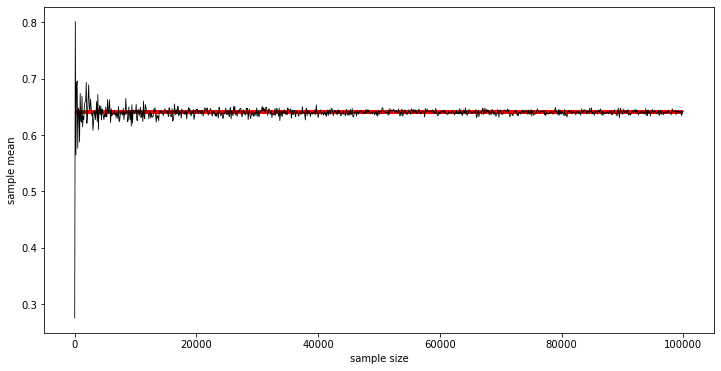

In [123]:
plt.figure(figsize=(12, 6))
plt.plot(size_array, unbias_var_array_size, color="black", lw=0.8)
# y=4, x는 0부터 size_array의 최대값까지
plt.hlines(0.64, 0, max(size_array), color="red", lw=4)
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

## 정규분포

In [124]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline